**Breast Cancer Prediction using K-Nearest Neighbor Classifier**

About the data

The 30 features of a breast mass are computed from a digital image and describe the characteristics of the cell nuclei present in the image. A total of 569 samples have been recorded in the data with 357 diagnosed as benign and 212 diagnosed as malignant. Because the dependent variable is a class, KNN classification model is implemented for this case.

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix  

In [ ]:
#Import the dataset
data_cancer= pd.read_csv("../input/breast-cancer.csv",header = 0)
data_cancer.head()

In [ ]:
#Dropping the id feature 
data_cancer.drop(columns = ['id'], inplace = True)
data_cancer.head()

#Converting non-numeric data to numeric dataset
diag_map = {'M':1, 'B':0}
data_cancer['diagnosis'] = data_cancer['diagnosis'].map(diag_map)

#Preparing the data set
diagnosis_all = list(data_cancer.shape)[0]
diagnosis_categories = list(data_cancer['diagnosis'].value_counts())

print("The dataset has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))
data_cancer.describe()

In [ ]:
#Normalizing numeric data
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min())) 
    dataNorm["diagnosis"]=dataset["diagnosis"]
    return dataNorm
data_normalized=normalize(data_cancer)
data_normalized.describe()

In [ ]:
#Creating training and test datasets
features_mean= list(data_normalized.columns[1:31])
X = data_normalized.loc[:,features_mean]
y = data_normalized.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [ ]:
#Training Model
classifier = KNeighborsClassifier(n_neighbors=21)  
classifier.fit(X_train, y_train) 

In [ ]:
#Testing the model
y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

In [ ]:
#Improve Model Performance
#z-score transformed
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

#Training the model
X_train_z = scaler.transform(X_train)  
X_test_z = scaler.transform(X_test) 
classifier = KNeighborsClassifier(n_neighbors=21)  
classifier.fit(X_train_z, y_train) 

#Testing the model
y_pred_z = classifier.predict(X_test_z)  
print(np.mean(y_pred_z != y_test))
print(confusion_matrix(y_test, y_pred_z))  
print(classification_report(y_test, y_pred_z)) 

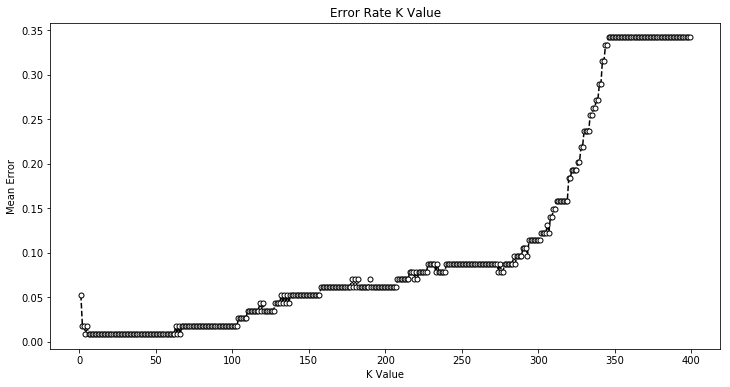

In [28]:
error = []

# Calculating error for K values between 1 and 400
for i in range(1, 400):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 400), error, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='white', markersize=5)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

plt.show()